# NDArray

In [1]:
import mxnet as mx 
import numpy as np
import matplotlib.pyplot as plt 
dir(mx)

['AttrScope',
 'Context',
 'MXNetError',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '__version__',
 '_ctypes',
 '_cy2',
 '_ndarray_internal',
 '_symbol_internal',
 'absolute_import',
 'attribute',
 'base',
 'callback',
 'context',
 'contrib',
 'cpu',
 'current_context',
 'executor',
 'executor_manager',
 'gpu',
 'image',
 'img',
 'init',
 'initializer',
 'io',
 'kv',
 'kvstore',
 'kvstore_server',
 'libinfo',
 'log',
 'lr_scheduler',
 'metric',
 'mod',
 'model',
 'module',
 'mon',
 'monitor',
 'name',
 'nd',
 'ndarray',
 'ndarray_doc',
 'notebook',
 'operator',
 'optimizer',
 'profiler',
 'random',
 'recordio',
 'registry',
 'rnd',
 'rnn',
 'rtc',
 'sym',
 'symbol',
 'symbol_doc',
 'test_utils',
 'th',
 'torch',
 'visualization',
 'viz']

## What is NDArray Module, like numpy! 

In [2]:
dir(mx.nd)

['Activation',
 'BatchNorm',
 'BilinearSampler',
 'BlockGrad',
 'Cast',
 'Concat',
 'Context',
 'Convolution',
 'Convolution_v1',
 'Correlation',
 'Crop',
 'CuDNNBatchNorm',
 'Custom',
 'Deconvolution',
 'Dropout',
 'ElementWiseSum',
 'Embedding',
 'Flatten',
 'FullyConnected',
 'GridGenerator',
 'IdentityAttachKLSparseReg',
 'InstanceNorm',
 'L2Normalization',
 'LRN',
 'LeakyReLU',
 'LinearRegressionOutput',
 'LogisticRegressionOutput',
 'MAERegressionOutput',
 'MakeLoss',
 'NDArray',
 'NDArrayBase',
 'NDArrayHandle',
 'Pad',
 'Pooling',
 'Pooling_v1',
 'RNN',
 'ROIPooling',
 'Reshape',
 'SVMOutput',
 'SequenceLast',
 'SequenceMask',
 'SequenceReverse',
 'SliceChannel',
 'Softmax',
 'SoftmaxActivation',
 'SoftmaxOutput',
 'SpatialTransformer',
 'SwapAxis',
 'UpSampling',
 '_DTYPE_MX_TO_NP',
 '_DTYPE_NP_TO_MX',
 '_LIB',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '_init_ndarray_module',
 '_internal',
 '_new_alloc_handle',
 '_new_empty_handle',
 '_os',
 '_sys

In [3]:
dir(np)

['ALLOW_THREADS',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'PackageLoader',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__name__',
 '__package__',
 '__path__',
 '__version__',
 '_distributor_init',
 '_globals',
 '_import_tools',
 '_mat',
 'abs',
 'absolute',
 'absolute_import',
 'ad

# What if I want to fast verify my network? Use NDArray

('img shape,', (512, 512, 3))
('img type, ', <type 'numpy.ndarray'>)
('mx ND ', <NDArray 512x512x3 @cpu(0)>)


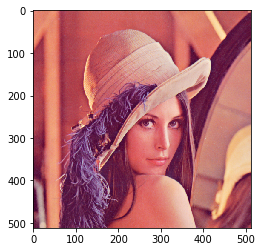

In [4]:
img_numpy = plt.imread('Lenna.png')
print ('img shape,', img_numpy.shape) #(HWC)
print ('img type, ', type(img_numpy))
data = mx.nd.array(img_numpy,ctx=mx.cpu()) # use mx.gpu(#) if you happen to have a/many gpus
print ('mx ND ', data)
plt.imshow(data.asnumpy()) # asnumpy is the magic communicating numpy and mxnet NDarray 
plt.show()

# Let us build a CNN!

In [5]:
#Again we have an image, Lenna, the Goddess. 
#But its axis follows HWC which is not the format that numpy/mxnet like.
#MXNet like N->C->H->W
#We need to do some image preprocessing
image  = mx.nd.transpose(data, axes=(2,0,1))
image = mx.nd.expand_dims(image,0)
print (image)

<NDArray 1x3x512x512 @cpu(0)>


# We want to do imge->conv->relu->pool->FC->softmax

# Let's do CONV first 

In [6]:
#define filter
w = mx.nd.ones((32,3,3,3), ctx=mx.cpu())/27.#follow NCHW
#bias = mx.nd.ones((32,1),ctx=mx.cpu())
conv = mx.nd.Convolution(data=image,num_filter=32, kernel=(3,3), pad=(1,1),stride=(1,1),weight=w,no_bias=True)
type(conv)

mxnet.ndarray.NDArray

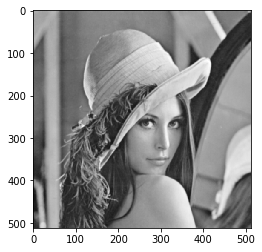

In [7]:
plt.imshow(conv.asnumpy()[0,0,:,:],cmap='gray')
plt.show()

# Then ReLU

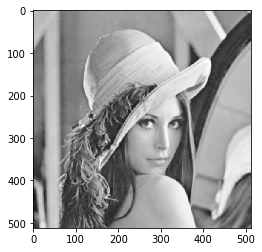

In [8]:
relu = mx.nd.Activation(data=conv,act_type='tanh')
#print (relu.asnumpy())
plt.imshow(relu.asnumpy()[0,0,:,:],cmap='gray')
plt.show()

# Then Pooling

(256, 256)


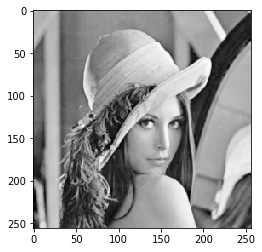

In [9]:
pool = mx.nd.Pooling(data=relu, kernel=(2,2), stride=(2,2), pool_type='max')
print (pool.asnumpy()[0,0,:,:].shape)
plt.imshow(pool.asnumpy()[0,0,:,:],cmap='gray')
plt.show()

# Then FC

In [10]:
w_fc = mx.nd.ones((10,np.prod(pool.shape)))/np.prod(pool.shape)
fc = mx.nd.FullyConnected(data=pool, num_hidden=10, weight=w_fc, no_bias=True)
print (fc.asnumpy())

[[ 0.4640016  0.4640016  0.4640016  0.4640016  0.4640016  0.4640016
   0.4640016  0.4640016  0.4640016  0.4640016]]


# Finally Softmax

In [11]:
softmax = mx.nd.softmax(fc)
print (softmax.asnumpy())
# Assume out label is People which index is 1
label = mx.nd.array([1])
loss = mx.nd.softmax_cross_entropy(fc,label)
print (loss.asnumpy())

[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]
[ 2.30258512]


# GOOOOOOD JOB